In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import linspace, array, log
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from rpy2.robjects import r
from rpy2.robjects.packages import importr
import numpy as np
import math
from scipy import stats

sns.set()

<span style="color:blue;">**Net Return**</span>

Let Pt be the price of an asset at time t. Assuming no dividends, the net return over the holding period from time t−1 to time t is
$$R_{t} = {P_{t} \over {P_{t-1}}} -1.$$

<span style="color:blue;">**Gross Return**</span>
$${P_{t} \over {P_{t-1}}} = 1 + R_{t}.$$


<span style="color:blue;">**Log Return**</span>

Log returns, also called continuously compounded returns.
$${r_{t}} = log{(1 + R_{t})} = log{P_{t} \over {P_{t-1}}} = {P_{t} - {P_{t-1}}}  $$

For small value of x log returns are approximately equal to returns because log(1+x) ≈ x. Let's plot it.

In [2]:
x = linspace(-0.3,0.3, 50)
y_log=log(1+x)
y = x

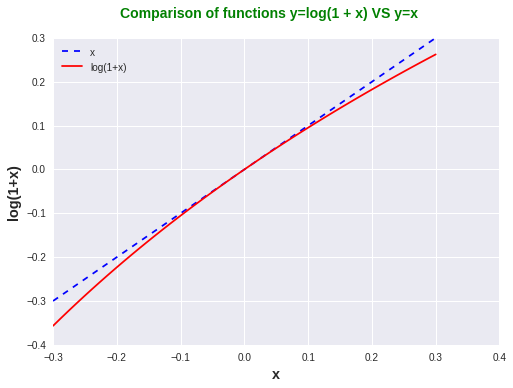

In [3]:
fig = plt.figure()
fig.suptitle('Comparison of functions y=log(1 + x) VS y=x', fontsize=14, fontweight='bold', color='g')
ax = fig.add_subplot(111)
ax.set_xlabel('x', size='large', fontweight='bold')
ax.set_ylabel('log(1+x)', size='large', fontweight='bold')
ax.plot(x,y, 'b--')
ax.plot(x,y_log, 'r-')
ax.legend(['x', 'log(1+x)'], loc='upper left')

**Random Walk Model**

The random walk hypothesis states that the single-period log returns, $r_t = log(1 + R_t)$, are independent. Because

${1 + R_t(k)} = {(1+R_{t}) · · · (1 + R_{t−k+1})}= exp^{(rt)} · · · exp^{(r_{( t−k+1 )})} = exp^{( r_t + · · · + r_{t−k+1} )}$

So finally we have
$$log{(1 + R_t(k))} = r_t + · · · + r_{(t−k+1)} $$

From normal distribution, normal random variables are themselves normal with  N(μ, σ2)
Under above assumption:
$$log{(1 + R_t(k))} = N{(k{\mu}, k{\sigma}^2)} $$


**-------------**
#### <span style="color:red;">Data Analysis</span>
**-------------**

Load data and explore.

In [4]:
dat = pd.read_csv("Stock_FX_Bond.csv")

In [5]:
dat.describe()

,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,MRK_AC,...,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
count,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4.963000e+03,4963.000000,...,4.963000e+03,4917.000000,4917.000000,4917.000000,3923.000000,4944.000000,4944.000000,1916.000000,4917.000000,2912.000000
mean,3534697.561958,28.881479,7135269.878702,9.854173,3383282.349385,19.447149,3546431.553496,18.214086,6.392737e+06,27.884219,...,7.283479e+08,4.995076,5.594623,6.299062,7.071746,7.483402,8.354318,1.080268,120.244214,1.970424
std,4184058.147988,12.086652,6274310.775873,6.356104,2036372.203284,16.568905,2194442.628891,15.778303,4.713258e+06,18.350074,...,6.359426e+08,2.025355,1.880885,1.582902,1.261452,1.356176,1.418911,0.147413,14.773249,0.799646
min,171400.000000,9.320000,303800.000000,2.310000,108800.000000,2.430000,343200.000000,3.380000,7.160000e+05,4.020000,...,1.246000e+07,0.880000,1.340000,3.130000,4.480000,4.760000,5.640000,0.827000,81.120000,0.832000
25%,1553100.000000,18.350000,3707200.000000,4.530000,2088800.000000,4.710000,2183100.000000,5.360000,4.038250e+06,10.850000,...,2.015700e+08,3.530000,4.350000,5.000000,5.980000,6.547500,7.370000,0.937400,108.530000,1.111000
50%,2382300.000000,26.990000,5351500.000000,7.760000,2985800.000000,13.680000,3144600.000000,14.390000,5.407400e+06,25.210000,...,4.496000e+08,5.320000,5.720000,6.110000,6.930000,7.400000,8.130000,1.076400,119.260000,1.954750
75%,3949750.000000,37.410000,8106700.000000,13.085000,4178800.000000,30.635000,4386000.000000,23.030000,7.428450e+06,43.995000,...,1.191900e+09,6.210000,6.810000,7.580000,8.110000,8.460000,9.412500,1.212250,129.900000,2.606750
max,69305000.000000,69.700000,83554704.000000,27.920000,39788400.000000,65.600000,39300800.000000,80.790000,1.450155e+08,73.870000,...,3.543790e+09,9.850000,9.880000,10.230000,10.250000,11.060000,12.040000,1.362500,159.900000,3.945000


In [6]:
dat.head()

,Date,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,...,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
0,2-Jan-87,922200,11.45,2540100,2.31,1130400,3.66,1218400,3.38,14454000,...,91880000,5.86,6.48,7.18,7.44,8.49,9.97,NaN,158.25,NaN
1,5-Jan-87,2100000,11.73,8670000,2.40,3032800,3.70,1752000,3.48,11538000,...,181900000,5.85,6.41,7.08,7.35,8.44,9.90,NaN,159.40,NaN
2,6-Jan-87,2720000,11.77,6992000,2.43,6614400,3.74,1206400,3.48,14279400,...,189300000,5.85,6.42,7.08,7.36,8.41,9.86,NaN,158.78,NaN
3,7-Jan-87,2000400,11.83,7621200,2.53,4233600,3.78,2188000,3.45,13003200,...,190900000,5.78,6.37,7.05,7.33,8.40,9.82,NaN,158.05,NaN
4,8-Jan-87,2460000,11.66,5807500,2.51,3816800,3.82,2195200,3.44,16320600,...,194500000,5.78,6.36,7.04,7.31,8.37,9.76,NaN,158.23,NaN


Change Date as index

In [7]:
dat.columns.values

array(['Date', 'GM_Volume', 'GM_AC', 'F_Volume', 'F_AC', 'UTX_Volume',
       'UTX_AC', 'CAT_Volume', 'CAT_AC', 'MRK_Volume', 'MRK_AC',
       'PFE_Volume', 'PFE_AC', 'IBM_Volume', 'IBM_AC', 'MSFT_Volume',
       'MSFT_AC', 'C_Volume', 'C_AC', 'XOM_Volume', 'XOM_AC', 'S&P_AC',
       'S&P_Volume', '1 year Treasury Constant Maturity Rate',
       '3-Year Treasury Constant Maturity Rate',
       '10 year Treasury Constant Maturity Rate',
       '30 year Treasury Constant Maturity Rate', 'Aaa Bond Yield',
       'Baa Bond Yield', '$/Euro', 'Yen/$', 'Brazil Real/$'], dtype=object)

Conver date time

In [8]:
dat['Date'] =  dat['Date'].apply(lambda d: (pd.to_datetime(d, format='%d-%b-%y')))

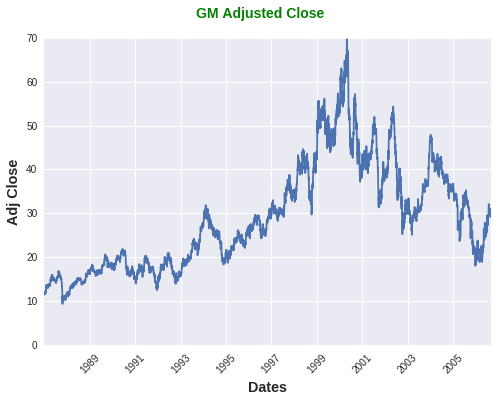

In [9]:
fig = plt.figure()
fig.suptitle('GM Adjusted Close', fontsize=14, fontweight='bold', color='g')
ax = fig.add_subplot(111)
ax.set_xlabel('Dates', size='large', fontweight='bold')
ax.set_ylabel('Adj Close', size='large', fontweight='bold')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.plot(dat['Date'], dat['GM_AC'])

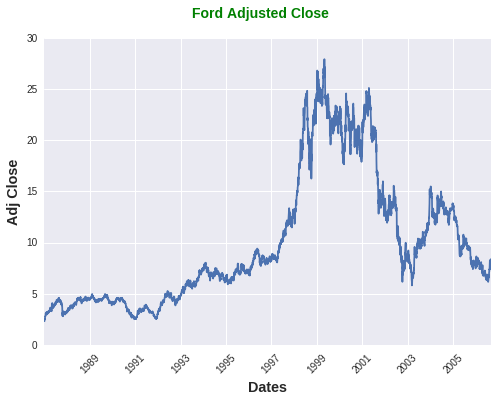

In [10]:
fig = plt.figure()
fig.suptitle('Ford Adjusted Close', fontsize=14, fontweight='bold', color='g')
ax = fig.add_subplot(111)
ax.set_xlabel('Dates', size='large', fontweight='bold')
ax.set_ylabel('Adj Close', size='large', fontweight='bold')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.plot(dat['Date'], dat['F_AC'])

- Normalize adjusted close for GM and Ford and plot them together

In [11]:
normalized_df = pd.DataFrame(dat, columns=['Date','GM_AC', 'F_AC'])

In [12]:
normalized_df.set_index('Date', inplace=True)
normalized_df.head()

,GM_AC,F_AC
Date,,
1987-01-02,11.45,2.31
1987-01-05,11.73,2.40
1987-01-06,11.77,2.43
1987-01-07,11.83,2.53
1987-01-08,11.66,2.51


In [13]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [14]:
normalized_df=normalize(normalized_df)

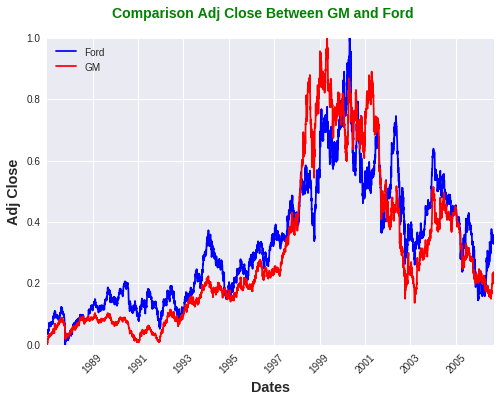

In [15]:
fig = plt.figure()
fig.suptitle('Comparison Adj Close Between GM and Ford', fontsize=14, fontweight='bold', color='g')
ax = fig.add_subplot(111)
ax.set_xlabel('Dates', size='large', fontweight='bold')
ax.set_ylabel('Adj Close', size='large', fontweight='bold')
ax.plot(normalized_df['GM_AC'], 'b-')
ax.plot(normalized_df['F_AC'], 'r-')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Ford', 'GM'], loc='upper left')
fig.savefig('AdjClose.png')

Now it's time to calculate daily return for these stocks

In [16]:
GMReturn = dat.GM_AC.pct_change()

In [17]:
GMReturn.head()

0         NaN
1    0.024454
2    0.003410
3    0.005098
4   -0.014370
Name: GM_AC, dtype: float64

In [18]:
FReturn = dat.F_AC.pct_change()

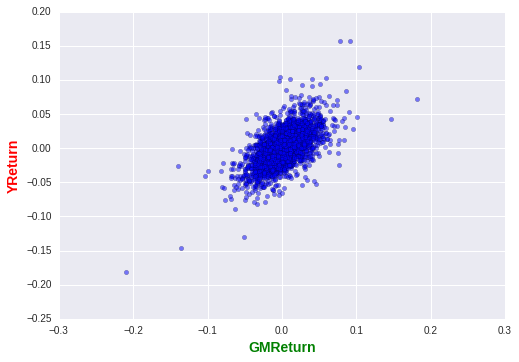

In [19]:
plt.scatter(GMReturn, FReturn, alpha=0.5)
plt.xlabel('GMReturn', fontsize=14, fontweight='bold', color='g')
plt.ylabel('YReturn', fontsize=14, fontweight='bold', color='r')

The  GM  and  Ford  returns  do  seem  positively  correlated.   There  are some outlying returns (${where}  |GM Return|>0.1
, |FReturn|>0.1)$. Outlying GM returns do seem to occur with outlying Ford returns.

In [20]:
GMReturn = pd.DataFrame()
GMReturn['DailyReturn'] = dat.GM_AC.pct_change()
GMReturn['LogReturn'] = np.log(dat.GM_AC/dat.GM_AC.shift())

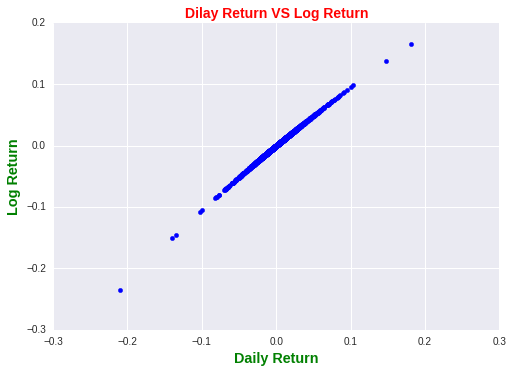

In [21]:
plt.scatter(GMReturn['DailyReturn'], GMReturn['LogReturn'], color='b')
plt.title('Dilay Return VS Log Return', fontsize=14, fontweight='bold', color='r')
plt.xlabel('Daily Return', size='large', fontweight='bold', color='g')
plt.ylabel('Log Return', size='large', fontweight='bold', color='g')

* Correlation between Log Return and Daily Return

In [22]:
GMReturn.corr()

,DailyReturn,LogReturn
DailyReturn,1.000000,0.999541
LogReturn,0.999541,1.000000


** --------------------------------------------------------------------------------------**

#### <span style="color:red;">Simulation : Leverage</spna>

** --------------------------------------------------------------------------------------**


* A hedge fund owns \$1,000,000 of stock.  Use \$50,000 of its own capital and \$950,000 in borrowed money.


* A hedge is an investment position intended to offset potential losses/gains that may be incurred by a companion investment.  In simple language, a hedge is used to reduce any substantial losses/gains suffered by an individual or an organization.


* If the value of the stock falls below $950,000 at the end of any trading day, then the hedge fund must sell the stock to repay the loan. 


* The hedge fund is said to be leveraged 20:1 since its position is 20 times the amount of its own capital invested.


* The daily log returns on the stock have a mean of 0.05/year and a standard deviation of 0.23/year.  (or mean=$0.05\over 253$ per trading day, deviation=$0.23 \over \sqrt{253}$ per tradingday

** <span style="color:orange;">What is the probability that the value of the stock will be below \$950,000 at the close of at least one of the next 45 trading days?</span>**

In [23]:
niter = 100000
below = range(niter)
rnorm = r('rnorm')  # create an alias to the R function rnorm
for i in range(1, niter):
    x = rnorm(n=45, mean=0.05/253, sd=0.23/np.sqrt(253))
    logPrice = log(1e6) + np.cumsum(x)
    minlogP = min(logPrice) # minimum price over next 45 days
    below[i] = int(minlogP < log(950000))
print "Probability that the value of the stock will be below $950,000 [",np.mean(below),"]"

Probability that the value of the stock will be below $950,000 [ 0.50826 ]


* Suppose the hedge fund will sell the stock for a profit of at least \$100,000 if the value of the stock rises to at least \$1,100,000 at the end of one of the first 100 trading days, 


* sell it for a loss if the value falls below \$950,000 at the end of one of the first 100 trading days


* sell after 100 trading days if the closing price has stayed between \$950,000 and \$1,100,000

####  <span style="color:orange;">What is the probability that the hedge fund will make a profit of at least \$100,000? </span>

In [24]:
niter = 10000
below = [0 for i in range(niter)]
above = [0 for i in range(niter)]
logPrice = [0 for i in range(niter)]
rnorm = r('rnorm')  # create an alias to the R function rnorm
for i in range(1, niter):
    x = rnorm(n=100, mean=0.05/253, sd=0.23/np.sqrt(253))
    for j in range(100):
        logPrice[i] = log(1000000) + np.cumsum(x)[j]
        if (logPrice[i] > log(1100000)):
            above[i]=1
            below[i]=0
            break
        elif (logPrice[i] < log(950000)):
            above[i]=0
            below[i]=1
            break
        else:
            above[i] = 0
            below[i] = 0
print "Mean Above (",np.mean(above),")" 
print "Mean Below (",np.mean(below),")"
profit = np.exp(np.mean(logPrice))-1000000
print "Profit (",profit,")"

Mean Above ( 0.392 )
Mean Below ( 0.5852 )
Profit ( 4994.92319373 )


<span style="color:green;">
**After 100000 iterations, the simulated probability that:**
</span>

* <span style="color:blue;"> Hedge fundwill make a proﬁt of at least \$100000 is 0.3947 </span>
* <span style="color:blue;"> Hedge fundwill make a loss of at least \$100000 is 0.5804 </span>
* <span style="color:blue;"> Based on above strategy expected profit is \$5668.07110857 </span>

####  <span style="color:orange;"> What is the expected return? 

* Only \$50,000 was invested. 
* Units of return are time, e.g, one can express a return as a daily return or a weekly return.
</span>

In [25]:
niter = 10000
below = [0 for i in range(niter)]
above = [0 for i in range(niter)]
logPrice = [0 for i in range(niter)]
bookedProfit = [0 for i in range(niter)]
rnorm = r('rnorm')  # create an alias to the R function rnorm
for i in range(1, niter):
    x = rnorm(n=100, mean=0.05/253, sd=0.23/np.sqrt(253))
    for j in range(100):
        logPrice[i] = log(1000000) + np.cumsum(x)[j]
        if (logPrice[i] > log(1100000)):
            above[i]=1
            below[i]=0
            bookedProfit[i] = np.exp(logPrice[i])-1000000
            break
        elif (logPrice[i] < log(950000)):
            above[i]=0
            below[i]=1
            bookedProfit[i] = np.exp(logPrice[i])-1000000
            break
        else:
            above[i] = 0
            below[i] = 0
#bookedProfit

---------------------------------
#### <span style='color:red'>            $$ McDonald’s  Stock  $$ </span>
--------------------------------

In [26]:
mcd_dat = pd.read_csv("MCD_PriceDaily.csv")

In [27]:
mcd_dat.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1/4/2010,62.63,63.07,62.31,62.78,5839300,53.99
1,1/5/2010,62.66,62.75,62.19,62.30,7099000,53.58
2,1/6/2010,62.20,62.41,61.06,61.45,10551300,52.85
3,1/7/2010,61.25,62.34,61.11,61.90,7517700,53.24
4,1/8/2010,62.27,62.41,61.60,61.84,6107300,53.19


In [28]:
mcd_dat.set_index('Date', inplace=True)

* Plot Adj Close

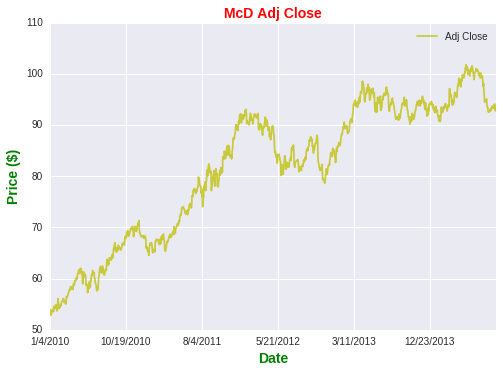

In [29]:
mcd_dat[['Adj Close']].plot(alpha=0.75, color='y')
plt.title("McD Adj Close",  fontsize=14, fontweight='bold', color='r')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='g')
plt.ylabel('Price ($)',  fontsize=14, fontweight='bold', color='g')

* Daily Return and Log Returns

In [30]:
mcd_returns = pd.DataFrame()
mcd_returns['Daily'] = mcd_dat['Adj Close'].pct_change()
mcd_returns['Log'] = np.log(mcd_dat['Adj Close']/mcd_dat['Adj Close'].shift())

In [31]:
mcd_returns.head()

,Daily,Log
Date,,
1/4/2010,NaN,NaN
1/5/2010,-0.007594,-0.007623
1/6/2010,-0.013624,-0.013718
1/7/2010,0.007379,0.007352
1/8/2010,-0.000939,-0.000940


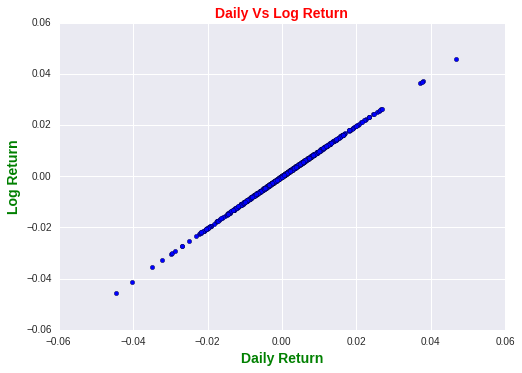

In [32]:
plt.scatter(mcd_returns['Daily'], mcd_returns['Log'])
plt.title("Daily Vs Log Return",  fontsize=14, fontweight='bold', color='r')
plt.xlabel('Daily Return', fontsize=14, fontweight='bold', color='g')
plt.ylabel('Log Return',  fontsize=14, fontweight='bold', color='g')

In [33]:
print mcd_returns.Daily.describe()
print mcd_returns.Log.describe()

count    1176.000000
mean        0.000503
std         0.008900
min        -0.044529
25%        -0.004358
50%         0.000745
75%         0.005432
max         0.046848
Name: Daily, dtype: float64
count    1176.000000
mean        0.000463
std         0.008901
min        -0.045551
25%        -0.004367
50%         0.000745
75%         0.005417
max         0.045783
Name: Log, dtype: float64


In [34]:
mcd_returns['Daily'].fillna(0, inplace=True)
mcd_returns['Log'].fillna(0, inplace=True)